## Purpose

We are going to explore, review and create a report choosing the best mutual funds. 

In [1]:
!pip install html5lib

### HTML/Web Scraping: You can aslo Scrape data from HTML tables on webpages

In [2]:
import pandas as pd

# URL of the webpage containing the table
url = 'https://finance.yahoo.com/screener/predefined/top_mutual_funds/?offset=0&count=100'

# Extract all tables from the webpage
tables = pd.read_html(url)

# Print the number of tables found
print(f"Number of tables found: {len(tables)}")

# Access the first table (adjust the index if needed)
data_from_html = tables[0]

# Display the scraped data
print("Data scraped from HTML table:")
print(data_from_html)

# Transform the DataFrame into a CSV file
csv_file_path = 'top_mutual_funds.csv'
data_from_html.to_csv(csv_file_path, index=False)

print(f"Data has been saved to {csv_file_path}")


Number of tables found: 1
Data scraped from HTML table:
   Symbol                                               Name  Change % Change  \
0   RYZCX                            Rydex Precious Metals C    0.74   +2.74%   
1   RYPMX                          Rydex Precious Metals Inv    1.02   +2.73%   
2   ENPIX                   ProFunds UltraSector Energy Fund    1.16   +2.72%   
3   ENPSX                   ProFunds UltraSector Energy Fund    0.98   +2.71%   
4   RYMNX                            Rydex Precious Metals A    0.94   +2.71%   
5   RYMPX                            Rydex Precious Metals H    0.90   +2.71%   
6   FEURX                                First Eagle Gold R6    0.58   +2.22%   
7   BIVRX                                 Invenomic Investor    0.37   +2.22%   
8   FEGOX                                 First Eagle Gold C    0.50   +2.20%   
9   BIVSX                      Invenomic Super Institutional    0.38   +2.19%   
10  FEGIX                                 First Eagle

## Step 1 - Import and Inspect the data. 

- what are the data types
- Is the dataset missing data?
- What values are for each column?

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("top_mutual_funds.csv")

In [5]:
df.dtypes

Symbol               object
Name                 object
Change              float64
% Change             object
Price (Intraday)    float64
50 Day Average      float64
200 Day Average     float64
3-Mo Return          object
YTD Return           object
52 Week Range       float64
dtype: object

In [6]:
df.head()

,Symbol,Name,Change,% Change,Price (Intraday),50 Day Average,200 Day Average,3-Mo Return,YTD Return,52 Week Range
0,RYZCX,Rydex Precious Metals C,0.74,+2.74%,27.00,27.81,24.55,40.48%,17.16%,NaN
1,RYPMX,Rydex Precious Metals Inv,1.02,+2.73%,37.38,38.47,33.70,40.84%,17.64%,NaN
2,ENPIX,ProFunds UltraSector Energy Fund,1.16,+2.72%,42.57,46.04,43.00,12.36%,15.75%,NaN
3,ENPSX,ProFunds UltraSector Energy Fund,0.98,+2.71%,36.13,39.11,36.51,12.08%,15.25%,NaN
4,RYMNX,Rydex Precious Metals A,0.94,+2.71%,34.68,35.69,31.32,40.74%,17.51%,NaN


### Observation: The titles have spaces between them, let's fix that

In [7]:
df.columns = df.columns.str.replace(' ', '_')

Observations: We can see that there are some columns that need to be changed from objects to floats so we can do some calculations.

- % Change             object
- 3-Mo Return          object
- YTD Return           object

In [8]:
df.dtypes

Symbol               object
Name                 object
Change              float64
%_Change             object
Price_(Intraday)    float64
50_Day_Average      float64
200_Day_Average     float64
3-Mo_Return          object
YTD_Return           object
52_Week_Range       float64
dtype: object

## Step 2 - Change variable types if necessary


In [9]:
#df['percentage'] = df['percentage'].str.replace('%', '').astype(float)
df['%_Change'] = df['%_Change'].str.replace('%', '').astype(float)
df['3-Mo_Return'] = df['3-Mo_Return'].str.replace('%', '').astype(float)
df['YTD_Return'] = df['YTD_Return'].str.replace('%', '').astype(float)

In [10]:
df.head()

,Symbol,Name,Change,%_Change,Price_(Intraday),50_Day_Average,200_Day_Average,3-Mo_Return,YTD_Return,52_Week_Range
0,RYZCX,Rydex Precious Metals C,0.74,2.74,27.00,27.81,24.55,40.48,17.16,NaN
1,RYPMX,Rydex Precious Metals Inv,1.02,2.73,37.38,38.47,33.70,40.84,17.64,NaN
2,ENPIX,ProFunds UltraSector Energy Fund,1.16,2.72,42.57,46.04,43.00,12.36,15.75,NaN
3,ENPSX,ProFunds UltraSector Energy Fund,0.98,2.71,36.13,39.11,36.51,12.08,15.25,NaN
4,RYMNX,Rydex Precious Metals A,0.94,2.71,34.68,35.69,31.32,40.74,17.51,NaN


In [11]:
#Example: df['column_name'] = df['column_name'].astype(float)
df['Percent_Change'] = df['%_Change'].astype(float)
df['3-Mo_Return'] = df['3-Mo_Return'].astype(float)
df['YTD_Return'] = df['YTD_Return'].astype(float)

In [12]:
df.dtypes

Symbol               object
Name                 object
Change              float64
%_Change            float64
Price_(Intraday)    float64
50_Day_Average      float64
200_Day_Average     float64
3-Mo_Return         float64
YTD_Return          float64
52_Week_Range       float64
Percent_Change      float64
dtype: object

### Let's do some exploring of the data through graphs

Text(0, 0.5, 'Change of Mutual Fund')

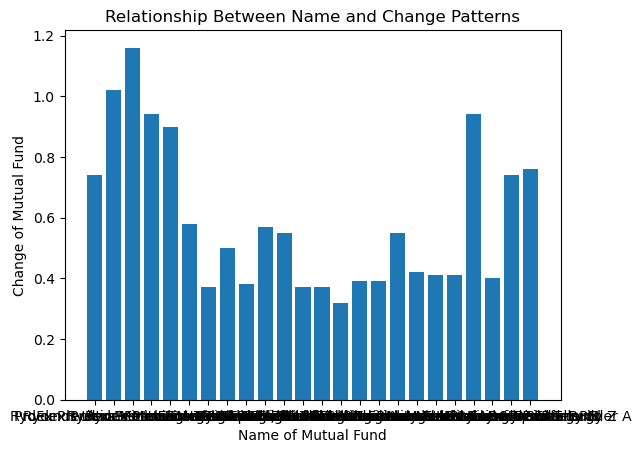

In [13]:
import matplotlib.pyplot as plt
#Question: What is the Mutual Fund has the highest change?
plt.bar(df.Name, df.Change)
#Creating a main title
plt.title('Relationship Between Name and Change Patterns')
#Creating the x label
plt.xlabel("Name of Mutual Fund")
#Creating the y label
plt.ylabel("Change of Mutual Fund")

Text(0, 0.5, 'Name of Mutual Fund')

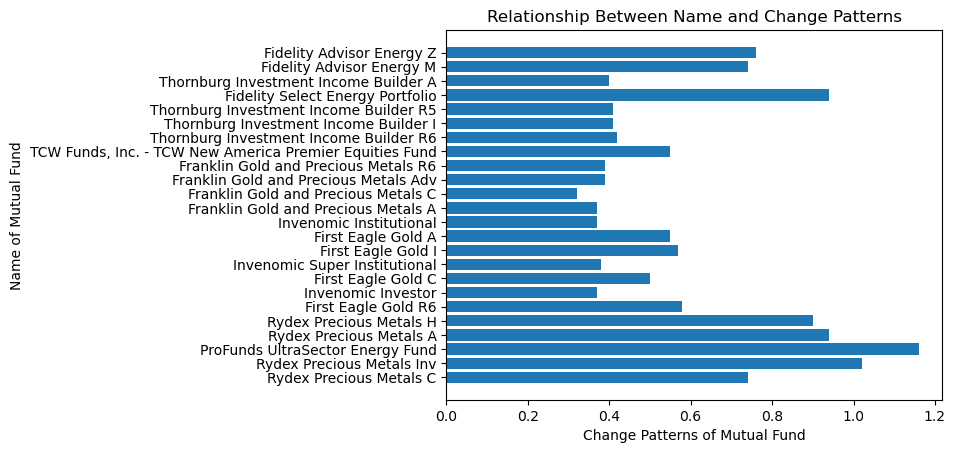

In [14]:
#NOTICE
#plt.barh("Insert your x here ", "Insert your y variable here")
#add the barh
plt.barh(df.Name, df.Change)
#Creating main title
plt.title('Relationship Between Name and Change Patterns')
#Creating the x label
plt.xlabel("Change Patterns of Mutual Fund")
#Creating the y label
plt.ylabel("Name of Mutual Fund")

Text(0, 0.5, 'Name of Mutual Fund')

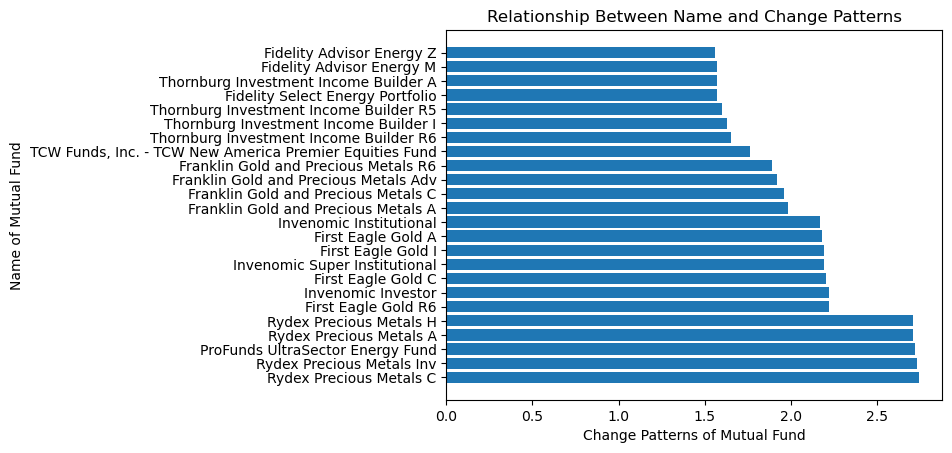

In [15]:
#NOTICE
#plt.barh("Insert your x here ", "Insert your y variable here")
#add the barh
plt.barh(df.Name, df.Percent_Change)
#Creating main title
plt.title('Relationship Between Name and Change Patterns')
#Creating the x label
plt.xlabel("Change Patterns of Mutual Fund")
#Creating the y label
plt.ylabel("Name of Mutual Fund")